In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def initialize_lattice_2d(L, p):
    """
    Initializes an LxL hexagonal lattice with open sites based on probability p.
    """
    # Randomly open sites with probability p
    lattice = np.random.rand(L, L) < p
    return lattice

# this here is Z^2

In [3]:
def percolates_2d(lattice):
    """
    Checks if the system percolates (has an infinite cluster).

    It works by asigning a number to each cluster and seeing if the top row (bottom row) share one of those uniquely identified clusters 
    """


    # num := total number of connected components 
    # lw := matrix of evaluated random variables, can be seen as a complete configuration in the probabilistic sense

    # np.unique :=1D NumPy array containing the unique values found in the specified slice of the array.
    # Elimination of Duplicates: np.unique() removes duplicate values and keeps only one instance of each unique value.
    # Sorting: It then returns the unique values in ascending order, regardless of their original order in the array.


    # Label clusters of connected open hexes
    lw, num = label(lattice)

  

    # Check for top-to-bottom spanning
    top_labels = np.unique(lw[0, :])
    bottom_labels = np.unique(lw[-1, :])
    spanning_labels_tb = np.intersect1d(top_labels, bottom_labels)

    
    # Check for left-to-right spanning
    left_labels = np.unique(lw[:, 0])
    right_labels = np.unique(lw[:, -1])
    spanning_labels_lr = np.intersect1d(left_labels, right_labels)

    # System percolates if there's a spanning cluster in either direction
    spanning_label = None
    if spanning_labels_tb[-1] > 0 and len(spanning_labels_tb) > 0:
        spanning_label = spanning_labels_tb[-1]
    elif spanning_labels_lr[-1] > 0 and len(spanning_labels_lr) > 0:
        spanning_label = spanning_labels_lr[-1]
    # if conditions are such that the spanning label array is non empty (edge case) and that its largest element is not 0 (the trivial spanning cluster)

    print(f"smallest spanning cluster is: {spanning_label}")

    if spanning_label is not None:
        print(f"The system percolates! Spanning label: {spanning_label}")
    else:
        print("The system does not percolate.")    

    return spanning_label, lw  # Return the label of the spanning cluster and labeled grid



smallest spanning cluster is: 2
The system percolates! Spanning label: 2


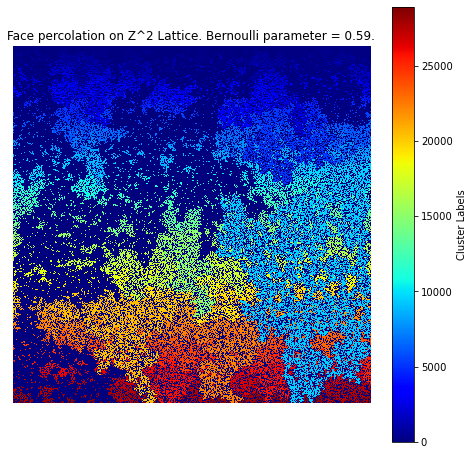

In [25]:
def visualize_lattice_Z2(lattice,parameter):
    plt.figure(figsize=(8, 8))
    plt.imshow(lattice, cmap='jet', interpolation='nearest')
    plt.colorbar(label='Cluster Labels')
    plt.title(f"Face percolation on Z^2 Lattice. Bernoulli parameter = {parameter}.")
    plt.axis('off')  # Hide axis
    plt.show()

# testing
size = 1000
parameter = 0.59
lattice = initialize_lattice_2d(size, parameter)  # Adjust the probability as needed
spanning_label, lw = percolates_2d(lattice)
visualize_lattice_Z2(lw, parameter)

# nicest effects at p = 0.59

In [5]:
# initialising the 3D Z^3 lattice
def initialize_lattice_3d(size, p):
    """Initialize a 3D lattice with open (1) and closed (0) sites."""
    return np.random.choice([0, 1], size=(size, size, size), p=[1-p, p])


In [6]:


def percolates_3d(lattice):
    """
    Checks if the system percolates (has an infinite cluster).

    It works by asigning a number to each cluster and seeing if the top row (bottom row) share one of those uniquely identified clusters 
    """


    # num := total number of connected components 
    # lw := matrix of evaluated random variables, can be seen as a complete configuration in the probabilistic sense

    # np.unique :=1D NumPy array containing the unique values found in the specified slice of the array.
    # Elimination of Duplicates: np.unique() removes duplicate values and keeps only one instance of each unique value.
    # Sorting: It then returns the unique values in ascending order, regardless of their original order in the array.


    # Label clusters of connected open hexes
    lw, num = label(lattice)

  
    #Check for top-to-bottom spanning
    top_labels = np.unique(lw[0, :, :])
    bottom_labels = np.unique(lw[-1, :, :])
    spanning_labels_tb = np.intersect1d(top_labels, bottom_labels)

    # Check for left-to-right spanning
    left_labels = np.unique(lw[:, 0, :])
    right_labels = np.unique(lw[:, -1, :])
    spanning_labels_lr = np.intersect1d(left_labels, right_labels)

    # Check for front-to-back spanning
    front_labels = np.unique(lw[:, :, 0])
    back_labels = np.unique(lw[:, :, -1])
    spanning_labels_fb = np.intersect1d(front_labels, back_labels)

    # System percolates if there's a spanning cluster in any direction
    spanning_label = None
    if len(spanning_labels_tb) > 0 and spanning_labels_tb[-1] > 0:
        spanning_label = spanning_labels_tb[-1]
    elif len(spanning_labels_lr) > 0 and spanning_labels_lr[-1] > 0:
        spanning_label = spanning_labels_lr[-1]
    elif len(spanning_labels_fb) > 0 and spanning_labels_fb[-1] > 0:
        spanning_label = spanning_labels_fb[-1]

    print(f"smallest spanning cluster is: {spanning_label}")

    if spanning_label is not None:
        print(f"The system percolates! Spanning label: {spanning_label}")
    else:
        print("The system does not percolate.")    

    return spanning_label, lw  # Return the label of the spanning cluster and labeled grid


In [7]:

def visualize_lattice_3d(lattice,parameter):
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get the coordinates of the open sites
    x, y, z = np.indices(lattice.shape)

    mask = lattice > 0

    x = x[mask]
    y = y[mask]
    z = z[mask]
    cluster_labels = lattice[mask]  # Get the corresponding cluster labels

    scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='jet', alpha=0.7)  # Adjust alpha for transparency
    plt.colorbar(scatter, label='Cluster Labels')
   
    
    ax.set_title(f"Face Percolation on Z^3 Lattice. Bernoulli parameter = {parameter}.")
    plt.show()



smallest spanning cluster is: None
The system does not percolate.


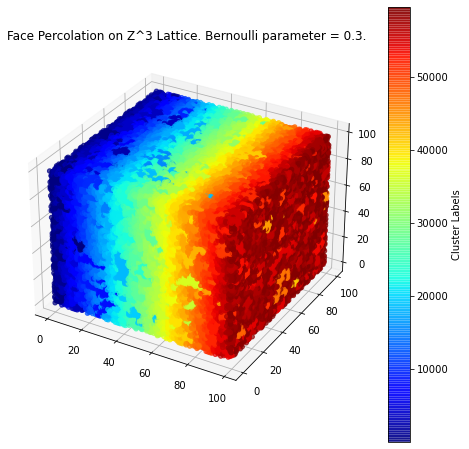

In [ ]:
# Testing the code
size = 100  # Adjust the size as needed

# do not go over 100, computation time is too long
p = 0.3   # Adjust the probability for open sites
lattice = initialize_lattice_3d(size, p)
spanning_label, lw = percolates_3d(lattice)
visualize_lattice_3d(lw,p)

# nicest effects at 0.3

Observations for 3d



The spanning label at p = 0.35 is not 1 (which you would expect) its bigger but still relatively small like between 2 and 10 

It probably is (also) 1 but since you dont print out the whole spanning label and only the smallest, youre getting that there are many infinite clusters (which is intereesting in itself.)

# to do
- change the percolating functions so they output the whole spanning label array
- write a little animation to visualise the phase transition 
- Make sure theoretically you understand what is happening on Z^2 and Z^3 for face percolation.

# theory questions

- why is the number of labeled clusters so large for Z^3 below the critical value
- why is it that for both systems the critical value seems to be below 1/2 for low N values.

# coding questions

- how to visualise different lattices ex hexagons
- how to visualise what is happening inside Z^3, interactively remove one colour?
